In [1]:
import pandas as pd
from moral_foundations_llms.utils import label_comment

comments = pd.read_csv("../data/aita_comments_Aug17.csv")
comments.head()


,id,flair_text,comment,score,comment_author,comment_time,comment_parent_id,comment_depth,comment_permalink,author_comment_karma,author_link_karma
0,xt1ksm,Open Forum,Do people with two digits to their age really ...,58,HellaShelle,2022-10-10 17:02:14,t3_xt1ksm,0,https://reddit.com/r/AmItheAsshole/comments/xt...,96466.0,1476.0
1,xt1ksm,Open Forum,Lots of posts in the last 3-4 days about rando...,53,GodspeedandGoodnight,2022-10-15 06:01:00,t3_xt1ksm,0,https://reddit.com/r/AmItheAsshole/comments/xt...,259332.0,5784.0
2,xt1ksm,Open Forum,Sometimes I think people are making up stories...,42,MrBleah,2022-10-11 22:58:48,t3_xt1ksm,0,https://reddit.com/r/AmItheAsshole/comments/xt...,115770.0,57836.0
3,xt1ksm,Open Forum,There’s not really anything the mods can do bu...,76,deleted,2022-10-03 03:58:00,t3_xt1ksm,0,https://reddit.com/r/AmItheAsshole/comments/xt...,NaN,NaN
4,xt1ksm,Open Forum,Saw it on FB but it's hilarious how threads wi...,35,RokkakuPolice,2022-10-13 00:59:20,t3_xt1ksm,0,https://reddit.com/r/AmItheAsshole/comments/xt...,15028.0,107.0


In [2]:
subs = pd.read_csv("../data/aita_w_gpt_w_mfd.csv")
subs.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/aita_w_gpt_w_mfd.csv'

In [57]:
subs.shape

(11355, 25)

In [52]:
df = comments.merge(subs, left_on='id', right_on='submission_id', how='left')


In [66]:
df.columns

Index(['id', 'flair_text_x', 'comment', 'score_x', 'comment_author',
       'comment_time', 'comment_parent_id', 'comment_depth',
       'comment_permalink', 'author_comment_karma', 'author_link_karma',
       'submission_id', 'title', 'selftext', 'created_utc', 'permalink',
       'score_y', 'flair_text_y', 'top_comment', 'true_label', 'gpt_dilemma',
       'gpt_label', 'gpt_reason', 'care_p', 'fairness_p', 'loyalty_p',
       'authority_p', 'sanctity_p', 'care_sent', 'fairness_sent',
       'loyalty_sent', 'authority_sent', 'sanctity_sent',
       'moral_nonmoral_ratio', 'f_var', 'sent_var', 'comment_label'],
      dtype='object')

In [58]:
df.shape

(556094, 36)

In [59]:
df['comment_label'] = df.apply(label_comment, axis=1)


In [96]:
df.columns

Index(['id', 'flair_text_x', 'comment', 'score_x', 'comment_author',
       'comment_time', 'comment_parent_id', 'comment_depth',
       'comment_permalink', 'author_comment_karma', 'author_link_karma',
       'submission_id', 'title', 'selftext', 'created_utc', 'permalink',
       'score_y', 'flair_text_y', 'top_comment', 'true_label', 'gpt_dilemma',
       'gpt_label', 'gpt_reason', 'care_p', 'fairness_p', 'loyalty_p',
       'authority_p', 'sanctity_p', 'care_sent', 'fairness_sent',
       'loyalty_sent', 'authority_sent', 'sanctity_sent',
       'moral_nonmoral_ratio', 'f_var', 'sent_var', 'comment_label'],
      dtype='object')

In [103]:
t = df[df['flair_text_y']=='Not the A-hole']
t.comment_label.value_counts()

comment_label
NTA    184024
YTA      6876
ESH      3765
NAH      3038
N/A      1031
Name: count, dtype: int64

In [61]:
df.comment_label.value_counts()

comment_label
NTA    287948
YTA     84387
ESH     11207
NAH      9045
N/A      2941
Name: count, dtype: int64

In [62]:
df.to_csv('../data/aita_comments_Aug17_labels.csv',index=False)

<Axes: >

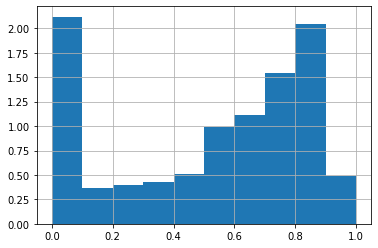

In [31]:
df.groupby('id').label.agg(lambda x: (x == 'NTA').mean()).hist(density=True)

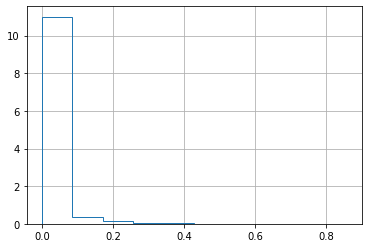

In [44]:
df.groupby('id').label.agg(lambda x: (x == 'NAH').mean()).hist(density=True,histtype='step');


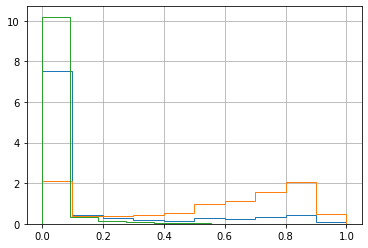

In [41]:
df.groupby('id').label.agg(lambda x: (x == 'YTA').mean()).hist(density=True,histtype='step');
df.groupby('id').label.agg(lambda x: (x == 'NTA').mean()).hist(density=True,histtype='step');
df.groupby('id').label.agg(lambda x: (x == 'ESH').mean()).hist(density=True,histtype='step');


## For each bin (.1) in this distribution in NTA agreement, get the top 10 post with the highest scores 

In [69]:
nta_proportions = df.groupby('id').apply(lambda group: (group['comment_label'] == 'NTA').mean())
nta_df = df.merge(nta_proportions.rename('nta_proportion'), left_on='id', right_index=True)
bins = [i / 10 for i in range(11)] # Bins from 0 to 1 with an interval of 0.1
nta_df['bin'] = pd.cut(nta_df['nta_proportion'], bins=bins)

def top_10_posts(group):
    return group.nlargest(10, 'score_x')

top_posts_per_bin = nta_df.groupby('bin').apply(top_10_posts)

In [70]:
top_posts_per_bin.shape

(100, 39)

In [91]:
top_posts_per_bin.head()

id flair_text_x  \
bin                                       
(0.0, 0.1] 479313  11jkp2q      Asshole   
           291130  10bnywp      Asshole   
           550818  120q23e      Asshole   
           355685  10qwvbt      Asshole   
           326118  10k60uu      Asshole   

                                                             comment  score_x  \
bin                                                                             
(0.0, 0.1] 479313  What kind of asshole tells a woman's parents t...    85805   
           291130  YTA for several reasons, two of which are call...    57645   
           550818  The baby is obviously at fault here. Selfish j...    46533   
           355685  YTA. We know because you said this was about h...    46026   
           326118  YTA.\n\nThis is incredibly transphobic! Amy is...    45054   

                         comment_author         comment_time  \
bin                                                            
(0.0, 0.1] 479313       DanyDragonQueen  2023-03-06 02:08:21   
           291130  Primary-Criticism929  2023-01-14 13:14:09   
           550818               deleted  2023-03-24 17:03:00   
           355685           BringMeInfo  2023-02-01 15:09:14   
           326118          realstareyes  2023-01-24 14:01:15   

                  comment_parent_id  comment_depth  \
bin                                                  
(0.0, 0.1] 479313        t3_11jkp2q              0   
           291130        t3_10bnywp              0   
           550818        t3_120q23e              0   
           355685        t3_10qwvbt              0   
           326118        t3_10k60uu              0   

                                                   comment_permalink  \
bin                                                                    
(0.0, 0.1] 479313  https://reddit.com/r/AmItheAsshole/comments/11...   
           291130  https://reddit.com/r/AmItheAsshole/comments/10...   
           550818  https://reddit.com/r/AmItheAsshole/comments/12...   
           355685  https://reddit.com/r/AmItheAsshole/comments/10...   
           326118  https://reddit.com/r/AmItheAsshole/comments/10...   

                   author_comment_karma  ...  fairness_sent loyalty_sent  \
bin                                      ...                               
(0.0, 0.1] 479313               32447.0  ...      -0.045093    -0.023449   
           291130             1260824.0  ...       0.040147     0.024904   
           550818                   NaN  ...      -0.054543    -0.037252   
           355685              125424.0  ...      -0.021996     0.003646   
           326118              384783.0  ...      -0.005906    -0.007103   

                  authority_sent sanctity_sent moral_nonmoral_ratio     f_var  \
bin                                                                             
(0.0, 0.1] 479313      -0.029994     -0.078474             4.266667  0.000144   
           291130       0.023828     -0.040455             3.000000  0.000065   
           550818      -0.021831     -0.096475             2.600000  0.000089   
           355685      -0.001012     -0.057653             1.305263  0.000052   
           326118      -0.044042     -0.057508             1.875000  0.000065   

                   sent_var comment_label nta_proportion         bin  
bin                                                                   
(0.0, 0.1] 479313  0.000633          None       0.096774  (0.0, 0.1]  
           291130  0.002127           YTA       0.057971  (0.0, 0.1]  
           550818  0.001638          None       0.006452  (0.0, 0.1]  
           355685  0.001245           YTA       0.054286  (0.0, 0.1]  
           326118  0.000931           YTA       0.050000  (0.0, 0.1]  

[5 rows x 39 columns]

In [88]:
# no contradicting posts?
print(top_posts_per_bin.groupby('id').size().mean())

1.075268817204301


In [83]:
# use idxmax?

def top_comment(group):
    top_score_index = group['score_x'].idxmax()
    return group.loc[top_score_index]

top_comments = top_posts_per_bin.groupby('id', group_keys=False).apply(top_comment)

In [85]:
def top_different_label(group):
    top_label = group.loc[group['score_x'].idxmax()]['comment_label']
    different_label_group = group[group['comment_label'] != top_label]
    if different_label_group.empty:
        return None
    top_diff_label_index = different_label_group['score_x'].idxmax()
    return different_label_group.loc[top_diff_label_index]

top_diff_label_comments = top_posts_per_bin.groupby('id', group_keys=False).apply(top_different_label).dropna()


In [86]:
top_diff_label_comments

,id,flair_text_x,comment,score_x,comment_author,comment_time,comment_parent_id,comment_depth,comment_permalink,author_comment_karma,...,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,comment_label,nta_proportion,bin
id,,,,,,,,,,,,,,,,,,,,,


# New approach: Subset NTA, then get top-scoring and contradicting comments

In [104]:
subset_data = df[df['flair_text_y'] == 'Not the A-hole']


In [105]:
# Find the Top-Scoring Comment for Each Post:

def top_comment(group):
    top_score_index = group['score_x'].idxmax()
    return group.loc[top_score_index]

top_comments = subset_data.groupby('id', group_keys=False).apply(top_comment)

In [106]:
# Find the Top-Scoring Comment with a Different Label for Each Post:

def top_different_label(group):
    top_label = group.loc[group['score_x'].idxmax()]['comment_label']
    different_label_group = group[group['comment_label'] != top_label]
    if different_label_group.empty:
        return None
    top_diff_label_index = different_label_group['score_x'].idxmax()
    return different_label_group.loc[top_diff_label_index]

top_diff_label_comments = subset_data.groupby('id', group_keys=False).apply(top_different_label).dropna()


In [108]:
top_diff_label_comments.columns

Index(['id', 'flair_text_x', 'comment', 'score_x', 'comment_author',
       'comment_time', 'comment_parent_id', 'comment_depth',
       'comment_permalink', 'author_comment_karma', 'author_link_karma',
       'submission_id', 'title', 'selftext', 'created_utc', 'permalink',
       'score_y', 'flair_text_y', 'top_comment', 'true_label', 'gpt_dilemma',
       'gpt_label', 'gpt_reason', 'care_p', 'fairness_p', 'loyalty_p',
       'authority_p', 'sanctity_p', 'care_sent', 'fairness_sent',
       'loyalty_sent', 'authority_sent', 'sanctity_sent',
       'moral_nonmoral_ratio', 'f_var', 'sent_var', 'comment_label'],
      dtype='object')

In [107]:
top_diff_label_comments

,id,flair_text_x,comment,score_x,comment_author,comment_time,comment_parent_id,comment_depth,comment_permalink,author_comment_karma,...,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,comment_label
id,,,,,,,,,,,,,,,,,,,,,
1003glw,1003glw,Not the A-hole,All of the YTA people have apparently never ha...,91.0,RevolutionaryCow7961,2022-12-31 23:53:10,t3_1003glw,0.0,https://reddit.com/r/AmItheAsshole/comments/10...,25611.0,...,0.094371,-0.018556,-0.050400,0.016076,-0.014711,-0.092165,2.647059,0.000224,0.001687,YTA
1004c68,1004c68,Not the A-hole,NTA I wanted to say ESH here but like the amou...,172.0,ReviewOk929,2022-12-31 22:04:30,t3_1004c68,0.0,https://reddit.com/r/AmItheAsshole/comments/10...,505219.0,...,0.086860,-0.061057,0.012990,0.018468,0.023269,-0.034379,1.914286,0.000036,0.001407,N/A
1004qtg,1004qtg,Not the A-hole,NTA - he’s almost gone. I get why they may thi...,340.0,One-Awareness4609,2022-12-31 22:01:03,t3_1004qtg,0.0,https://reddit.com/r/AmItheAsshole/comments/10...,40870.0,...,0.097130,-0.041210,-0.021349,0.020856,-0.015926,-0.059306,1.283951,0.000049,0.000906,N/A
100au6c,100au6c,Not the A-hole,NAH. This literally happened with my parents a...,368.0,OHRavenclaw,2023-01-01 03:49:20,t3_100au6c,0.0,https://reddit.com/r/AmItheAsshole/comments/10...,14330.0,...,0.091600,0.017206,0.095398,0.077215,0.093847,0.031324,1.586957,0.000106,0.001326,NAH
100fzew,100fzew,Not the A-hole,"Honestly, ESH.\n\nShe is undoubtedly acting li...",1019.0,ButterMyParsnip,2023-01-01 09:29:35,t3_100fzew,0.0,https://reddit.com/r/AmItheAsshole/comments/10...,23826.0,...,0.082937,-0.082155,-0.001046,0.005085,0.020199,-0.042476,1.490566,0.000075,0.001743,ESH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz2i40,zz2i40,Not the A-hole,"ESH. Christ, I'm exhausted just by *reading* a...",611.0,schoobydoo42,2022-12-30 15:09:56,t3_zz2i40,0.0,https://reddit.com/r/AmItheAsshole/comments/zz...,227249.0,...,0.090593,-0.074027,-0.024696,-0.010918,-0.038933,-0.118472,1.287879,0.000153,0.001874,ESH
zz3d1x,zz3d1x,Not the A-hole,NAH you can't make any sort of plans until thi...,23.0,GMUcovidta,2022-12-30 15:44:56,t3_zz3d1x,0.0,https://reddit.com/r/AmItheAsshole/comments/zz...,120710.0,...,0.087545,-0.073962,0.002202,0.001423,-0.013030,0.011936,1.657143,0.000101,0.001192,NAH
zz3hxq,zz3hxq,Not the A-hole,It sounds like an NAH situation. Your sis is a...,9.0,drake_crus,2022-12-30 15:47:28,t3_zz3hxq,0.0,https://reddit.com/r/AmItheAsshole/comments/zz...,1880.0,...,0.082756,-0.078129,-0.079027,0.026766,-0.040270,-0.073883,2.485714,0.000070,0.002046,NAH


In [ ]:
top_posts_per_bin.to_csv('../data/top100comments.csv')